In [1]:
#Importation des librairies
import pandas as pd #lire les datasets
import numpy as np #La manipulation des tableau
import seaborn as sb #Pour la visualisation

In [2]:
#importation de la source des donnees
df = pd.read_csv('data/NBA_season1718_salary.csv')

In [4]:
#Decouverte de la base de donnees
df.head(10)

,Unnamed: 0,Player,Tm,season17_18
563,564,Trey McKinney-Jones,IND,46080.0
564,565,Jameel Warney,DAL,46080.0
565,566,Marcus Thornton,CLE,46080.0
566,567,DeAndre Liggins,ATL,26773.0
567,568,Axel Toupane,NOP,25000.0
568,569,Quinn Cook,NOP,25000.0
569,570,Chris Johnson,HOU,25000.0
570,571,Beno Udrih,DET,25000.0
571,572,Joel Bolomboy,MIL,22248.0
572,573,Jarell Eddie,CHI,17224.0


In [5]:
#Verification des valeurs manquantes
df.isnull().sum()

Unnamed: 0     0
Player         0
Tm             0
season17_18    0
dtype: int64

In [6]:
df.shape

(573, 4)

<Axes: xlabel='season17_18'>

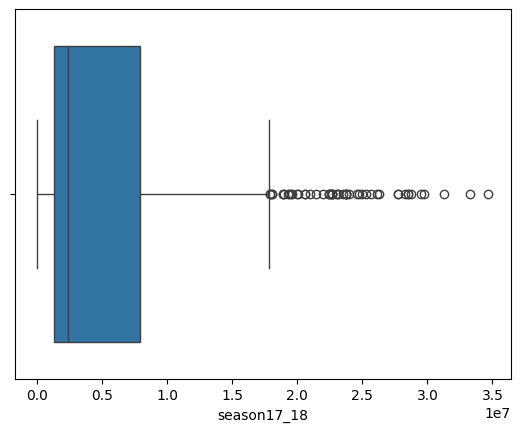

In [7]:
#boxplot appliquer juste pour les salaires
sb.boxplot(x=df['season17_18'])


In [8]:
#detecter les valeurs aberantes
upper_lim=df['season17_18'].quantile(.95)
df_outliers = df[df['season17_18']>upper_lim]
df_outliers

,Unnamed: 0,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0
5,6,Kyle Lowry,TOR,28703704.0
6,7,Russell Westbrook,OKC,28530608.0
7,8,Mike Conley,MEM,28530608.0
8,9,James Harden,HOU,28299399.0
9,10,DeMar DeRozan,TOR,27739975.0


In [10]:
# detecter les valeurs aberantes la technique z_score
outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for i in data:
        z_score=(i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i)
    return outliers

In [11]:
#detecter les salaires consideres comme valeurs aberantes
detect_outliers(df['season17_18'])

[34682550.0,
 33285709.0,
 31269231.0,
 29727900.0,
 29512900.0,
 28703704.0,
 28530608.0,
 28530608.0,
 28299399.0,
 27739975.0,
 27734405.0]